In [9]:
# Imports/Constants

import ijson
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

NUM_REVIEWS = 50000
PATH = "C:\\Users\\Tyler\\repos\\AI_Spoiler_Detection\\data\\part-01.json"

%matplotlib inline

In [10]:
# Load Data
reviews = []

with open(PATH, 'rb') as f:
    parser = ijson.items(f, 'item')
    for i, review in enumerate(parser):
        if i >= NUM_REVIEWS:
            break

        reviews.append(review)

df = pd.DataFrame(reviews)
print(f"Loaded {len(df)} reviews")

Loaded 50000 reviews


In [11]:
# Structural Information
print(f"Data shape: {df.shape}")
print(f"columns: {df.columns.tolist()}")
print("Data types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Data shape: (50000, 9)
columns: ['review_id', 'reviewer', 'movie', 'rating', 'review_summary', 'review_date', 'spoiler_tag', 'review_detail', 'helpful']
Data types:
review_id         object
reviewer          object
movie             object
rating            object
review_summary    object
review_date       object
spoiler_tag        int64
review_detail     object
helpful           object
dtype: object

First few rows:


,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life (2019– ),9,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","[1, 1]"
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"[2, 2]"
2,rw5704484,brightconscious,Special OPS (2020– ),7,Nothing special,3 May 2020,0,"Except K K , no other actor looks comfortable ...","[0, 0]"
3,rw5704485,gasconyway,#BlackAF (2020– ),8,Good but,3 May 2020,0,I'm guessing that as a 62 year old white woman...,"[5, 9]"
4,rw5704487,mmason-15867,The Droving (2020),2,An honest review,3 May 2020,0,Here's the truth. There's not much to this mov...,"[26, 41]"


Spoiler distribution:
spoiler_tag
0    39051
1    10949
Name: count, dtype: int64

Percentages:
spoiler_tag
0    78.102
1    21.898
Name: proportion, dtype: float64


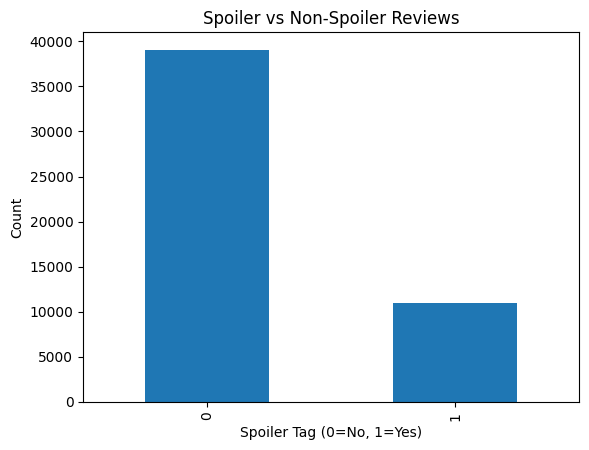

In [12]:
# Class Balance
print("Spoiler distribution:")
print(df['spoiler_tag'].value_counts())
print("\nPercentages:")
print(df['spoiler_tag'].value_counts(normalize=True)*100)

# Visualize
df['spoiler_tag'].value_counts().plot(kind='bar')
plt.title("Spoiler vs Non-Spoiler Reviews")
plt.xlabel('Spoiler Tag (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [13]:
# Missing Values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
review_id            0
reviewer             0
movie                0
rating            4075
review_summary       0
review_date          0
spoiler_tag          0
review_detail        0
helpful              0
dtype: int64


Review detail length stats:
count    50000.000000
mean      1015.377800
std       1048.852541
min         15.000000
25%        288.000000
50%        713.000000
75%       1309.000000
max       9993.000000
Name: detail_len, dtype: float64


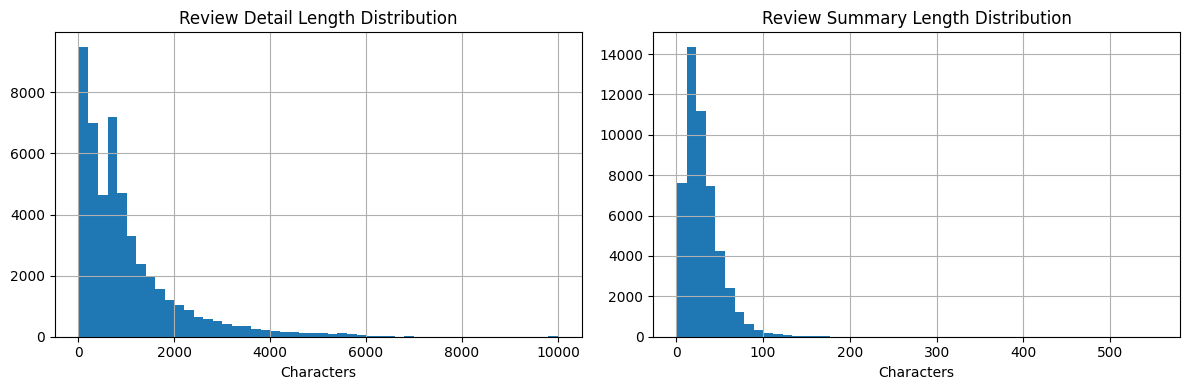

In [14]:
# Length Analysis
df['summary_len'] = df['review_summary'].str.len()
df['detail_len'] = df['review_detail'].str.len()

print("Review detail length stats:")
print(df['detail_len'].describe())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df['detail_len'].hist(bins=50, ax=axes[0])
axes[0].set_xlabel('Characters')
axes[0].set_title('Review Detail Length Distribution')

df['summary_len'].hist(bins=50, ax=axes[1])
axes[1].set_xlabel('Characters')
axes[1].set_title('Review Summary Length Distribution')

plt.tight_layout()
plt.show()

In [15]:
# Sample Reviews
print("=== Sample Non-Spoiler ===")
sample = df[df['spoiler_tag'] == 0].iloc[5]
print(f"Movie: {sample['movie']}")
print(f"Rating: {sample['rating']}")
print(f"Review: {sample['review_detail']}\n")

print("=== Sample Spoiler ===")
sample = df[df['spoiler_tag'] == 1].iloc[5]
print(f"Movie: {sample['movie']}")
print(f"Rating: {sample['rating']}")
print(f"Review: {sample['review_detail']}")

=== Sample Non-Spoiler ===
Movie: All About Eve (1950)
Rating: 10
Review: Having seen this film for the first time today, 70 years after its release and still having the impact that it has is outstanding. Excellent writing, directing and performances all around, particularly by Bette Davis and Anne Baxter in their respective immortal roles, as well as unpredictable and filled with complex characters and relationships, All About Eve is one of the best movies I have ever seen.As I got about halfway through the movie, I thought it was about how jealousy and resentment can drive the people away from you. But it's not. It's a movie about manipulation and how horrible people can con people into getting what they want. It's such a great film.

=== Sample Spoiler ===
Movie: Kingdom (2019– )
Rating: 6
Review: Overall it's a worthy binge watching series, it's just that the Prince character you'd find is not realistic (you'll know when you hit season 2). The other odd thing is, Seo-bi can avoid t